
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [ ]:
df.shape # Dimensiones del datasaet

(5358, 44)

In [ ]:
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

Para responder "¿Cuáles son los lenguajes de programación asociados a los mejores salarios?"

1. Analizar las columnas relacionadas a salario (bruto y neto), con la columna de lenguajes de programación: "tools_programming_languages" vs "salary_monthly_BRUTO" y/o "salary_monthly_NETO"

2. Proponemos explorar los datos considerando la antiguedad en la empresa. Esto es "work_years_in_company"

Para este fin, generamos un subset con las columnas de interés:

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 
                    'work_years_in_company', 'work_dedication']

df2 = df[relevant_columns]

# Exploración de las variables en busca de valores raros, nulos, etc.

In [ ]:
df2.isna().sum()
df2 = df2.dropna() 

Eliminamos registros con valores nulos

In [ ]:
df2 = df2[df2['work_dedication'] == 'Full-Time']
df2.value_counts(['work_dedication'])

work_dedication
Full-Time          5104
dtype: int64

Eliminamos contratos "Part-Time" para centrarnos sólo en los "Full-Time"

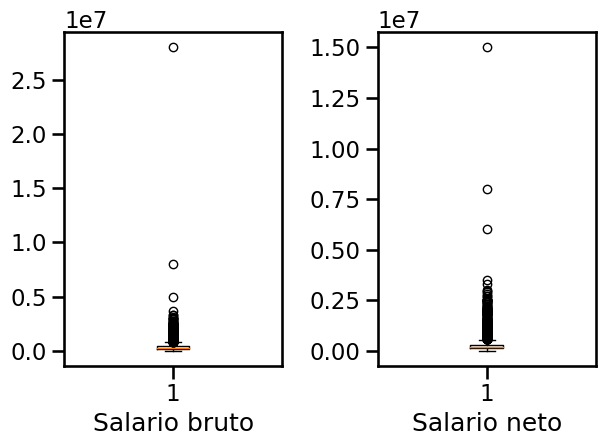

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data = df2, x = 'salary_monthly_BRUTO') 
axs[1].boxplot(data = df2, x = 'salary_monthly_NETO') 
axs[0].set_xlabel('Salario bruto')
axs[1].set_xlabel('Salario neto')
plt.tight_layout()
plt.show()

Contruimos gráficos boxplot para tener una idea aproximada de la distribución de los datos y posibles outliers.

In [ ]:
print('El valor máximo del salario mensual bruto es =', numpy.max(df['salary_monthly_BRUTO']))
print('El valor máximo del salario mensual negto es =', numpy.max(df['salary_monthly_NETO']))

El valor máximo del salario mensual bruto es = 28000000.0
El valor máximo del salario mensual negto es = 15000000.0


Observamos que hay salarios realmente elevados, apartados de la gran mayoría de los datos. Optamos por sólo eliminar el salario más alto por ser muy distorsivo.

In [ ]:
df2 = df2[df2['salary_monthly_BRUTO'] != 28000000]
df2 = df2[df2['salary_monthly_NETO'] != 15000000]

Graficamos de nuevo los boxplots.

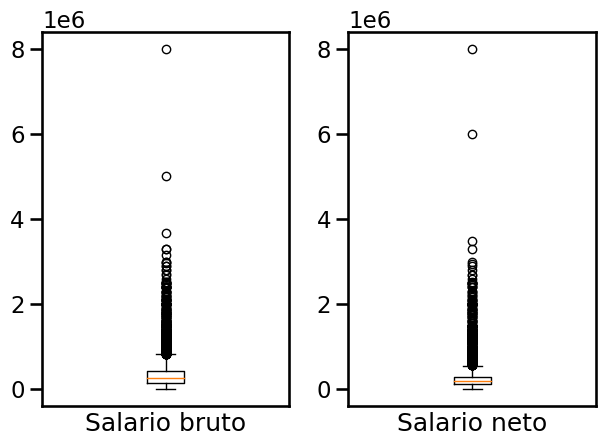

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data = df2, x = 'salary_monthly_BRUTO') 
axs[1].boxplot(data = df2, x = 'salary_monthly_NETO') 
axs[0].set_xlabel('Salario bruto')
axs[1].set_xlabel('Salario neto')
axs[0].tick_params(bottom=False, labelbottom=False)
axs[1].tick_params(bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

Notamos que el rango intercuartílico es estrecho, indicando que la gran parte de los profesionales poseen salarios distribuidos en un estrecho rango. Sin embargo notamos que algunos profesionales ganan muy por encima de dicho rango.

Notamos un elevado número de profesionales que declararon un salario neto de $ 0. Esto será analizado en más detalle en el ejercicio 2

In [ ]:
n_zeros = (df['salary_monthly_NETO'] == 0).sum()
print(f"Existen {n_zeros} valores iguales a cero en la columna 'salary_monthly_NETO'")
n_zerosb = (df['salary_monthly_BRUTO'] == 0).sum()
print(f"Existen {n_zerosb} valores iguales a cero en la columna 'salary_monthly_BRUTO'")


Existen 254 valores iguales a cero en la columna 'salary_monthly_NETO'
Existen 14 valores iguales a cero en la columna 'salary_monthly_BRUTO'


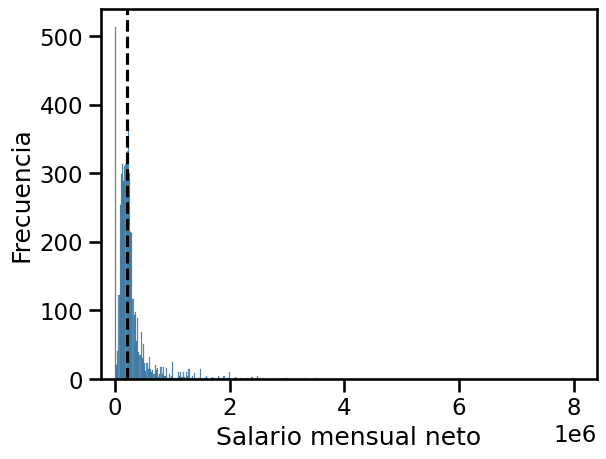


 La mediana es de $ 210000.0


In [ ]:
mediana = numpy.median(df2['salary_monthly_NETO'])

sns.histplot(data = df2, x = 'salary_monthly_NETO')
plt.xlim(-0.25E6, None)
plt.axvline(x = mediana, color = 'k', ls = '--')
plt.xlabel('Salario mensual neto')
plt.ylabel('Frecuencia')
plt.show()

print('\n', 'La mediana es de $', numpy.round(mediana))

Como podemos ver, la mediana del salario bruto mensual se ubica en $ 265000.


Procedemos a analizar brevemente la variable "work_years_in_company" y limpiar dicha columna.

In [ ]:
print(df2['work_years_in_company'].unique())

[ 0.    2.    1.6   1.   30.    3.    5.   20.   10.   12.    6.   11.
  9.   19.    7.   18.    4.    1.5  17.   22.    8.    2.5   1.3   3.9
 14.   24.   15.   16.    3.6  13.   23.   21.    1.4   1.2   1.75  2.8
 25.   26.    7.5   3.5   1.7  40.   28.   34.    2.7   1.9  80.    4.5
 29.   27.    0.6   1.8 ]


Notamos valores realmente altos tales como 80 años de experiencia, y valores extraños tales como 1,2. Eliminaremos los valores altos y redondearemos a valores enteros.

In [ ]:
df2['work_years_in_company'] = df2['work_years_in_company'].round()
df2 = df2[df2['work_years_in_company'] != 80]
print(df2['work_years_in_company'].unique())

[ 0.  2.  1. 30.  3.  5. 20. 10. 12.  6. 11.  9. 19.  7. 18.  4. 17. 22.
  8. 14. 24. 15. 16. 13. 23. 21. 25. 26. 40. 28. 34. 29. 27.]


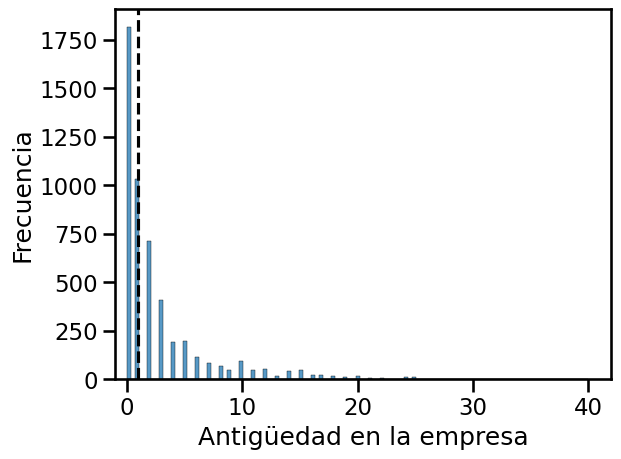


 La mediana es de 1.0 años


In [ ]:
mediana_work_years = numpy.median(df2['work_years_in_company'])

sns.histplot(data = df2, x = 'work_years_in_company')
plt.xlim(-1, None)
plt.axvline(x = mediana_work_years, color = 'k', ls = '--')
plt.xlabel('Antigüedad en la empresa')
plt.ylabel('Frecuencia')
plt.show()

print('\n', 'La mediana es de', numpy.round(mediana_work_years), 'años')

Notamos que la mediana se ubica en 1 año, claramente indicando que gran parte de los profesionales posee pocos años de antiguedad en la empresa que actualmente se encuentren trabajando.

Construimos una nueva columna a partir de los años de experiencia en la empresa, clasificando los profesionales en 5 categorias: 0-5, 5-10, 10-15, 15-20 y más de 25 años de permanencia en su puesto laboral. Esto lo hacemos para agrupar y facilitar el análisis.

In [ ]:
exp_categories = ['0-5', '5-10', '10-15', '15-20', '+25']
df2['work_years_in_company_ranges'] = pd.cut(df2['work_years_in_company'], [0, 5, 10, 15, 20, 80], labels = exp_categories, include_lowest = True)
df2.head()

,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_years_in_company,work_dedication,work_years_in_company_ranges,cured_programming_languages
0,Python,245000.0,300000.0,0.0,Full-Time,0-5,[python]
1,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,0-5,"[css, html, java, javascript, sql, typescript]"
2,"Javascript, PHP, Python",115000.0,120000.0,2.0,Full-Time,0-5,"[javascript, php, python]"
3,"Javascript, TypeScript",0.0,440000.0,0.0,Full-Time,0-5,"[javascript, typescript]"
4,"CSS, HTML, Javascript",125000.0,140000.0,0.0,Full-Time,0-5,"[css, html, javascript]"


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df2.tools_programming_languages[:3]

0                                          Python
1    CSS, HTML, Java, Javascript, SQL, TypeScript
2                         Javascript, PHP, Python
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.

def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df2.loc[:, 'cured_programming_languages'] = df2.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df2.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df2[relevant_columns])\
    .join(df2['work_years_in_company_ranges'])\
    .rename(columns={0: 'programming_language'})
df_lang.head()

<ipython-input-24-acaf773e5810>:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series).stack()\


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_years_in_company,work_dedication,cured_programming_languages,work_years_in_company_ranges
0,python,Python,245000.0,300000.0,0.0,Full-Time,[python],0-5
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts().reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2038
1,sql,1991
2,html,1451
3,python,1334
4,css,990
5,java,931
6,typescript,908
7,bash/shell,818
8,.net,588
9,php,566


In [ ]:
df_lang['programming_language'].unique().shape

(216,)

Hay 216 lenguajes de programación diferentes en el dataset, sin embargo seleccionaremos sólo los cinco lenguajes más usados.

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude

interesting_languages = df_lang['programming_language'].value_counts().index[:5] # Elijo los cinco lenguajes más populares
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_years_in_company,work_dedication,cured_programming_languages,work_years_in_company_ranges
0,python,Python,245000.0,300000.0,0.0,Full-Time,[python],0-5
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5
1,sql,"CSS, HTML, Java, Javascript, SQL, TypeScript",850000.0,900000.0,2.0,Full-Time,"[css, html, java, javascript, sql, typescript]",0-5


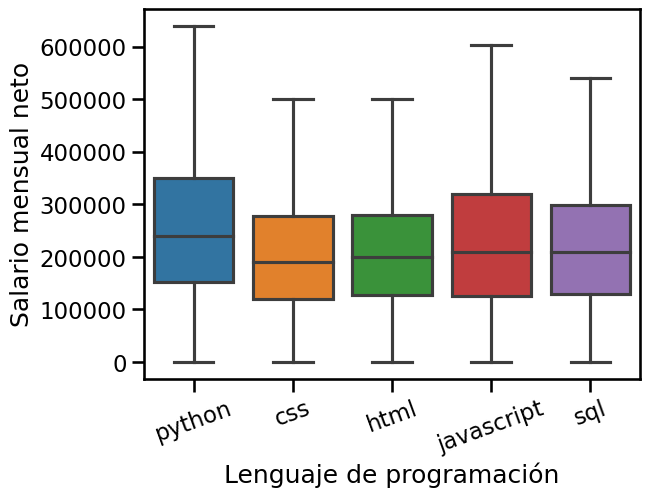

In [ ]:
sns.boxplot(data = filtered_df_lang, y = 'salary_monthly_NETO', x = 'programming_language', showfliers = False) 

plt.xlabel('Lenguaje de programación')
plt.ylabel('Salario mensual neto')
plt.xticks(rotation = 20) 
plt.show()

Mediante gráficos de cajas comparamos los salarios netos según el lenguaje de programación que dominen los profesionales del sector. Notamos que la mediana y el percentil 25% del lenguaje "python" se encuentran ligeramente por encima que en el casos de los otros lenguajes. Además, se encuentra que la distribución de salarios en "python" también es mayor que en los otros lenguajes. Por lo tanto, concluimos que "python" es el lenguaje de programación que está asociado a los salarios más altos. Recordemos que sólo analizamos los cinco lenguajes más populares. 

Analizamos el efecto que tiene los años de trabajo en la empresa en el salario de los profesonales que emplean python. Notamos primero que la mayoría de ellos poseen entre 0 y 5 años de permanencia.

In [ ]:
python = filtered_df_lang[filtered_df_lang['programming_language'] == 'python']
python['work_years_in_company_ranges'].value_counts()

0-5      1130
5-10      113
10-15      56
15-20      19
+25        16
Name: work_years_in_company_ranges, dtype: int64

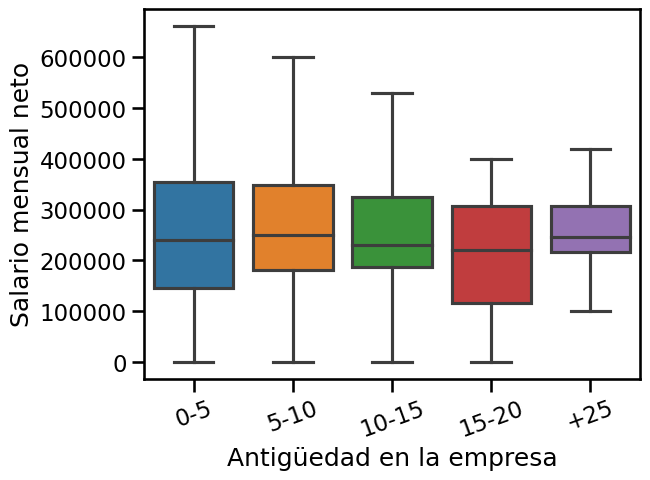

In [ ]:
sns.boxplot(data = python, y = 'salary_monthly_NETO', x = 'work_years_in_company_ranges', showfliers = False) 
plt.xlabel('Antigüedad en la empresa')
plt.ylabel('Salario mensual neto')
plt.xticks(rotation = 20) 
plt.show()

Observamos que la mediana es ligeramente mayor para los profesionales que poseen más de 25 años de permanencia, además observamos que el percentil 75% es más bajo que en los demás rangos de experiencia. La distribución de salarios en el caso de 0-5 años es la mayor, indicando que hay una proporcion de los profesionales que poseen muy buen sueldo, como que también ganan poco.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [ ]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

In [ ]:
relevant_columns = [ 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'profile_years_experience', 'profile_studies_level', 'profile_gender', ]
df3 = df[relevant_columns]

In [ ]:
df3.isna().sum()

salary_monthly_NETO            0
salary_monthly_BRUTO           0
profile_years_experience       0
profile_studies_level       2699
profile_gender                 0
dtype: int64

In [ ]:
df3 = df3[df3['salary_monthly_BRUTO'] != 28000000]
df3 = df3[df3['salary_monthly_NETO'] != 15000000]

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




<Axes: xlabel='profile_years_experience', ylabel='salary_monthly_NETO'>

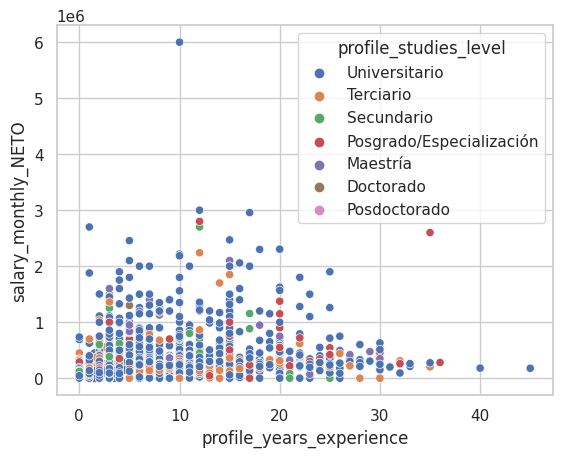

In [ ]:
##ingresos mensuales netos en función de los años de experiencia laboral, y nivel educativo:
sns.scatterplot(data=df, x='profile_years_experience', y='salary_monthly_NETO', hue='profile_studies_level')

Observamos que la mayoría de los datos provienen de personas con formación universitaria. Y que estas personas se encuentran ocupando cargos de mayor antiguedad. 

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



En primer lugar, graficamos el salario neto en función del salario bruto para así visualizar el comportamiento de estas variables.

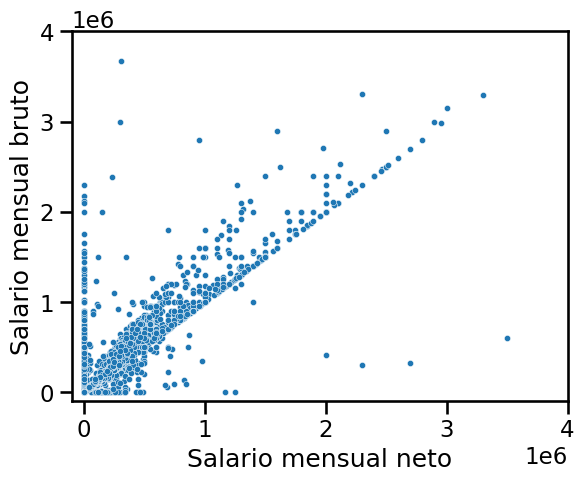

In [ ]:
sns.scatterplot(data = df3, x = 'salary_monthly_NETO', y = 'salary_monthly_BRUTO', s = 20)
plt.xlim(-0.01E7, 0.4E7)
plt.ylim(-0.01E7, 0.4E7)
plt.xlabel('Salario mensual neto')
plt.ylabel('Salario mensual bruto')
plt.show()

Notamos que parece haber una correlación positiva entre ambos salarios. Calculamos la correlación:

In [ ]:
df3['salary_monthly_NETO'].corr(df3['salary_monthly_BRUTO']).round(2)

0.83

La correlación asciende a 0.83, indicando que ambas variables están fuertemente vinculadas. También es importante notar que hay numerosos profesionales que informaron salario bruto al tiempo que informaron salario neto cero, y viceversa. Esto quizá se debe a que muchos profesionales reciben su sueldo en criptomonedas o por algún otro mecanismo que hace que no tributen sueldos. Eliminamos los salarios igual a cero y repetimos el scatterplot y el cálculo de la correlación.

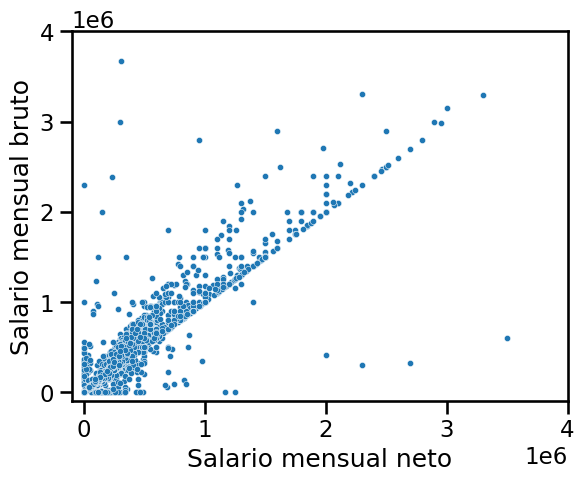

In [ ]:
df4 = df3[df3['salary_monthly_BRUTO'] != 0]
df4 = df3[df3['salary_monthly_NETO'] != 0]

sns.scatterplot(data = df4, x = 'salary_monthly_NETO', y = 'salary_monthly_BRUTO', s = 20)
plt.xlim(-0.01E7, 0.4E7)
plt.ylim(-0.01E7, 0.4E7)
plt.xlabel('Salario mensual neto')
plt.ylabel('Salario mensual bruto')
plt.show()

In [ ]:
df4['salary_monthly_NETO'].corr(df4['salary_monthly_BRUTO']).round(2)

0.89

El nuevo valor de correlación es ahora de 0,89. Este valor indica que ambos salarios están muy vinculados y que si deseásemos simplificar el dataset podriamos eliminar la columna de salario bruto. Decidimos trabajar con salario neto, ya que refleja el dinero real que recibe un trabajador en su cuenta bancaria cada mes, es decir que resulta una medida más precisa del poder adquisitivo de un trabajador.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df4['profile_studies_level'].unique()

array(['Universitario', nan, 'Terciario', 'Secundario',
       'Posgrado/Especialización', 'Maestría', 'Doctorado',
       'Posdoctorado'], dtype=object)

Hay entradas del tipo nan, estos pueden ser datos faltantes de la encuesta o posiblemente omisiones deliberadas al llenar este campo. Por lo tanto consideraremos los datos nan como "No sabe / No contesta" (NS/NC). 

In [ ]:
pd.options.mode.chained_assignment = None
df4['profile_studies_level'] = df4['profile_studies_level'].fillna('NS/NC') # Reemplazo los datos nan por "No sabe / No contesta"

In [ ]:
df4['profile_studies_level'].value_counts() # Contamos personas alcanzaron cada nivel de formación

NS/NC                       2570
Universitario               1725
Terciario                    409
Posgrado/Especialización     144
Secundario                   134
Maestría                      98
Doctorado                     19
Posdoctorado                   3
Name: profile_studies_level, dtype: int64

Las dos entradas más numerosas son "NS/NC" y "Universitario". Debido a que no conocemos la exacta naturaleza de "NS/NC", analizaremos los tres niveles de formación más numerosos: "NS/NC", "Universitario" y "Terciario".

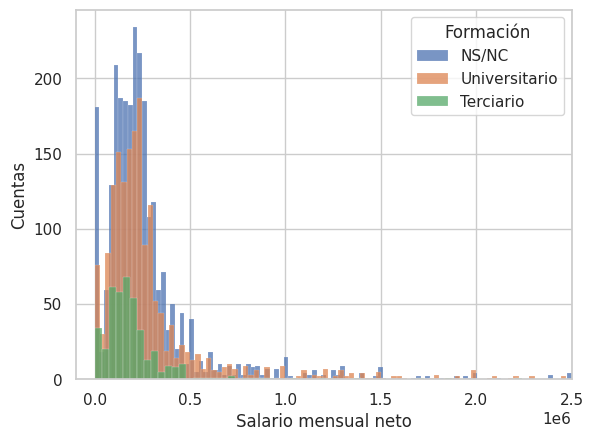

In [ ]:

for i in ['NS/NC', 'Universitario', 'Terciario']:
 sns.histplot(df4[df4['profile_studies_level'] == f'{i}'], x = 'salary_monthly_NETO', label = f'{i}') 


plt.xlim(-0.1E6, 2.5E6)
plt.xlabel('Salario mensual neto')
plt.ylabel('Cuentas')
plt.legend(title = 'Formación', loc = 'best')
plt.show()

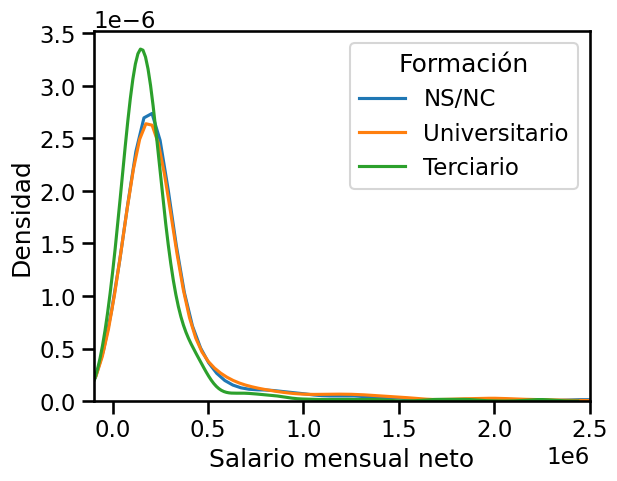

In [ ]:
for i in ['NS/NC', 'Universitario', 'Terciario']:
  sns.kdeplot(df4[df4['profile_studies_level'] == f'{i}'], x = 'salary_monthly_NETO', label = f'{i}') 

plt.xlim(-0.1E6, 2.5E6)
plt.xlabel('Salario mensual neto')
plt.ylabel('Densidad')
plt.legend(title = 'Formación', loc = 'best')
plt.show()

Parece existir cierta dependencia del salario neto con el nivel de formación, la moda del histograma de "Universitario" es encuentra a valores ligeramente mayores que del histograma "Terciario". Además, hay mayor proporción de salarios altos para "Universitario" y "NS/NC" que para "Terciario".

In [ ]:
for i in ['NS/NC', 'Universitario', 'Terciario']:

  mean = int(df4[df4.profile_studies_level == i]['salary_monthly_NETO'].mean())
  median = int(df4[df4.profile_studies_level == i]['salary_monthly_NETO'].median())
  std = int(df4[df4.profile_studies_level == i]['salary_monthly_NETO'].std())

  print('La media y la mediana para {} es $ {} y $ {}. La desviacion estandar es $ {}'.format(i, mean, median, std))

  ##Caldulamos a partir der la mediana, las diferencias entre los salarios de los distintos niveles educativos

uni_median = df4[df4.profile_studies_level == 'Universitario']['salary_monthly_NETO'].median()
nc_median = df4[df4.profile_studies_level == 'NS/NC']['salary_monthly_NETO'].median()
terc_median = df4[df4.profile_studies_level == 'Terciario']['salary_monthly_NETO'].median()

nc_diff = (uni_median - nc_median) / uni_median * 100
terc_diff = (uni_median - terc_median) / uni_median * 100

print('La mediana del nivel "NS/NC" es un {:.1f}% menor que la del nivel "Universitario"'.format(nc_diff))
print('La mediana del nivel "Terciario" es un {:.1f}% menor que la del nivel "Universitario"'.format(terc_diff))

La media y la mediana para NS/NC es $ 282855 y $ 212573. La desviacion estandar es $ 348270
La media y la mediana para Universitario es $ 302976 y $ 214000. La desviacion estandar es $ 370450
La media y la mediana para Terciario es $ 206651 y $ 166000. La desviacion estandar es $ 220647
La mediana del nivel "NS/NC" es un 0.7% menor que la del nivel "Universitario"
La mediana del nivel "Terciario" es un 22.4% menor que la del nivel "Universitario"


Calculamos dos medidas de posición (media y mediana) y una medida de dispersión (desviacion estándar). Estos valores acompañan a las observaciones realizadas mediante los histogramas. Según los datos proporcionados, la media salarial más alta corresponde al nivel educativo "Universitario", con un valor de $302976,  seguido  del nivel "NS/NC" con $282855 y finalmente el nivel "Terciario" con $206651. Sin embargo, para evaluar qué nivel educativo gana más dinero, consideramos la mediana, ya que es una medida menos sensible a los valores extremos. 
Para calcular el porcentaje de diferencia en salarios entre los distintos niveles educativos, tomamos como referencia la mediana del nivel "Universitario" y la comparamos con los restantes niveles. De esta manera, observamos que la mediana del nivel "NS/NC" es aproximadamente un 0,8% menor que la del nivel "Universitario", mientras que la mediana del nivel "Terciario" es aproximadamente un 22,3% menor que la del nivel "Universitario".


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Seleccionamos las variables numéricas "profile_years_experience" y "salary_monthly_NETO" y la variables categórica "profile_gender".

In [ ]:
df4.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

Se observa que existen numerosos géneros, para facilitar el análisis agrupamos los géneros en tres grandes grupos: "varon cis", "mujer cis" y "diversidades".

In [ ]:
df4.loc[:,'Género'] = df4.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis', 'Femenino': 'Mujer cis',
                                                   'mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades',
                                                   'No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades',
                                                   'Gay':'Diversidades'}).fillna(False)                 

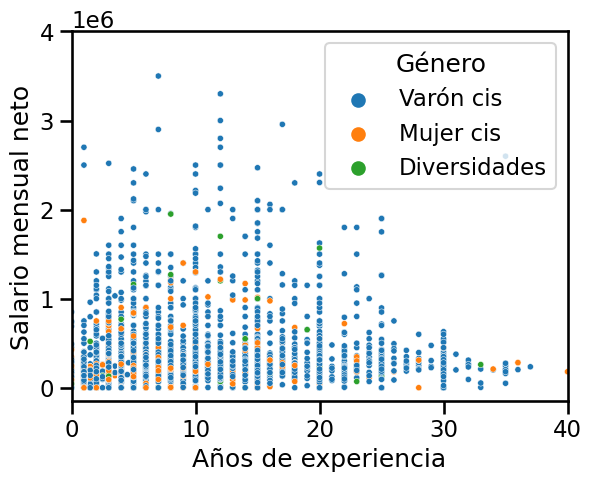

In [ ]:
sns.scatterplot(data = df4, x = 'profile_years_experience', y = 'salary_monthly_NETO', hue = 'Género', s = 20)
plt.xlim(0, 40)
plt.ylim(-0.15e6, 0.4e7)
plt.xlabel('Años de experiencia')
plt.ylabel('Salario mensual neto')
plt.show()

In [ ]:
df['salary_monthly_NETO'].corr(df['profile_years_experience']).round(2)

0.18

Realizamos un scatterplot diferenciando entre las categorías incluidas en la columna Gérnero. Observamos una amplia dispersión de datos, siendo los "Varon cis" los más numerosos por diferencia y los valores clasificados como "Diversidades" muy escasos. Se calculó el coeficiente de correlación entre el salario mensual neto y los años de experiencia es positivo pero bajo. Esto indica que los años de experiencia influyen de alguna medida en el salario pero seguramente otras variables poseen mayor efecto.